Medido:
Equipo:      S, Fecha:       19/05/2024, Hora:        14:20:40, Particula:   1, Energia:     6.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: , Detector:    CC13SN14317
R50 sin interpolar: 23.552190721649485
R50 interpolado: 27.8779
Equipo:      S, Fecha:       19/05/2024, Hora:        14:24:55, Particula:   1, Energia:     9.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: , Detector:    CC13SN14317
R50 sin interpolar: 35.369841269841274
R50 interpolado: 41.0146
Equipo:      S, Fecha:       19/05/2024, Hora:        14:28:52, Particula:   1, Energia:     12.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: , Detector:    CC13SN14317
R50 sin interpolar: 49.09168399168399
R50 interpolado: 56.2549
Equipo:      S, Fecha:       19/05/2024, Hora:        14:32:56, Particula:   1, Energia:     15.0, DFS:         100.0, TC:          20.0, Coordenada:  Z, Profundidad: , Detector:    CC13SN14317
R50 sin interpolar: 58.8979

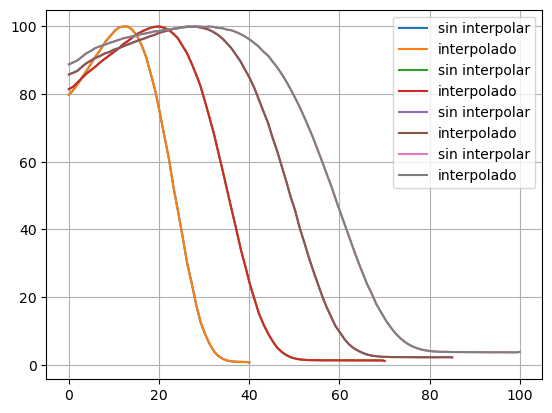

In [8]:
import numpy as np
import os
from Curvas import Curve
from Curvas import import_measured_curves, import_calculated_curves, print_curve_data, get_R50, SuavizaYNormaliza
from typing import List
import copy
import os
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as px

# measurement_file_path = r'P:\8 - Físicos Médicos\Roy\INTECNUS---RoyQA\Medido Platform 2024 fotones\X6 ago2024 Perfiles y PDDs.asc'
measurement_file_path = r'P:\8 - Físicos Médicos\Roy\INTECNUS---RoyQA\Medido 2024\synergy electrones 2024.csv'
# monaco_calculation_file_path = r'P:\8 - Físicos Médicos\Roy\INTECNUS---RoyQA\MONACO\SYNERGY\ELECTRONES\DFS 100\20x20\BLUEoELECoSYN.ELECoSYN.Transverse.0.00.1'.replace('\\','/')
# monaco_calculation_file_path = r'P:\8 - Físicos Médicos\Roy\INTECNUS---RoyQA\MONACO\SYNERGY\X06\DFS 100\30x30\BLUEx06oSYN.FotonesX06SYN.Coronal.150.00.4'.replace('\\','/')
meas_curves = import_measured_curves(measurement_file_path)
# calc_curves = import_calculated_curves(monaco_calculation_file_path, machine='S')

print('Medido:')

plt.figure()
for curve in meas_curves:
    if curve.coordinate == 'Z' and curve.field_size == 20:
        print_curve_data(curve)
        plt.plot(curve.axis,curve.relative_dose, label='sin interpolar')
        print(f'R50 sin interpolar: {get_R50(curve)}')

        SuavizaYNormaliza(curve, sigma=0.00005, espaciamiento=0.1)
        plt.plot(curve.axis,curve.relative_dose, label='interpolado')
        print(f'R50 interpolado: {get_R50(curve)}')
        
        # if curve.coordinate == 'X':
        # i_max = curve.relative_dose.argmax()
        # print(curve.relative_dose[i_max])
        # print(curve.axis[i_max])
        
        # plt.plot(curve.axis,curve.relative_dose, label=curve.coordinate)
    
        # plt.grid()
        # plt.legend()
        # if curve.coordinate != 'Z':
            # plt.ylim(48,52)
            # plt.xlim(-160,160)

# plt.xticks(np.arange(min(curve.axis), max(curve.axis) + 1, 1))  # X-axis ticks spaced by 1
plt.grid()
# plt.xlim(20,60)
# plt.ylim(45,55)
plt.legend()
plt.show()

# print('Calculado:')
# for curve in calc_curves:
#     print_curve_data(curve)

#     plt.figure()
#     plt.plot(curve.axis,curve.relative_dose, marker='.')
#     plt.show